In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

# setting params
params = {'legend.fontsize': 'large',
          'figure.figsize': (20, 10),
          'figure.dpi': 120,
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)
pd.options.display.max_colwidth = 800

from IPython.display import display, HTML

# Exploratory Data Analysis

## Preprocessing

[source](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)

In [6]:
hour_df = pd.read_csv("data/hour.csv")
print("Shape of data: {}".format(hour_df.shape))
hour_df.head()

Shape of data: (17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
# make attribute names more understandable
hour_df.rename(columns={"instant":"rec_id",
                        "dteday":"datetime",
                        "mnth":"month",
                        "holiday":"is_holiday",
                        "workingday":"is_workingday",
                        "weathersit":"weather_condition",
                        "hum":"humidity",
                        "yr":"year",
                        "hr":"hour",
                        "cnt":"total_count"}, inplace=True)

In [9]:
hour_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
# date time conversion
hour_df["datetime"] = pd.to_datetime(hour_df.datetime)
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             17379 non-null  int64         
 1   datetime           17379 non-null  datetime64[ns]
 2   season             17379 non-null  int64         
 3   year               17379 non-null  int64         
 4   month              17379 non-null  int64         
 5   hour               17379 non-null  int64         
 6   is_holiday         17379 non-null  int64         
 7   weekday            17379 non-null  int64         
 8   is_workingday      17379 non-null  int64         
 9   weather_condition  17379 non-null  int64         
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

In [11]:
# categorical variables conversion

category_variables = ["season", "is_holiday", "weekday", "weather_condition", 
                      "is_workingday", "month", "year", "hour"]
for var in category_variables:
    hour_df[var] = hour_df[var].astype("category")
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             17379 non-null  int64         
 1   datetime           17379 non-null  datetime64[ns]
 2   season             17379 non-null  category      
 3   year               17379 non-null  category      
 4   month              17379 non-null  category      
 5   hour               17379 non-null  category      
 6   is_holiday         17379 non-null  category      
 7   weekday            17379 non-null  category      
 8   is_workingday      17379 non-null  category      
 9   weather_condition  17379 non-null  category      
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

## Visualize Distribution and Trends

### Hourly distribution of bikes usage

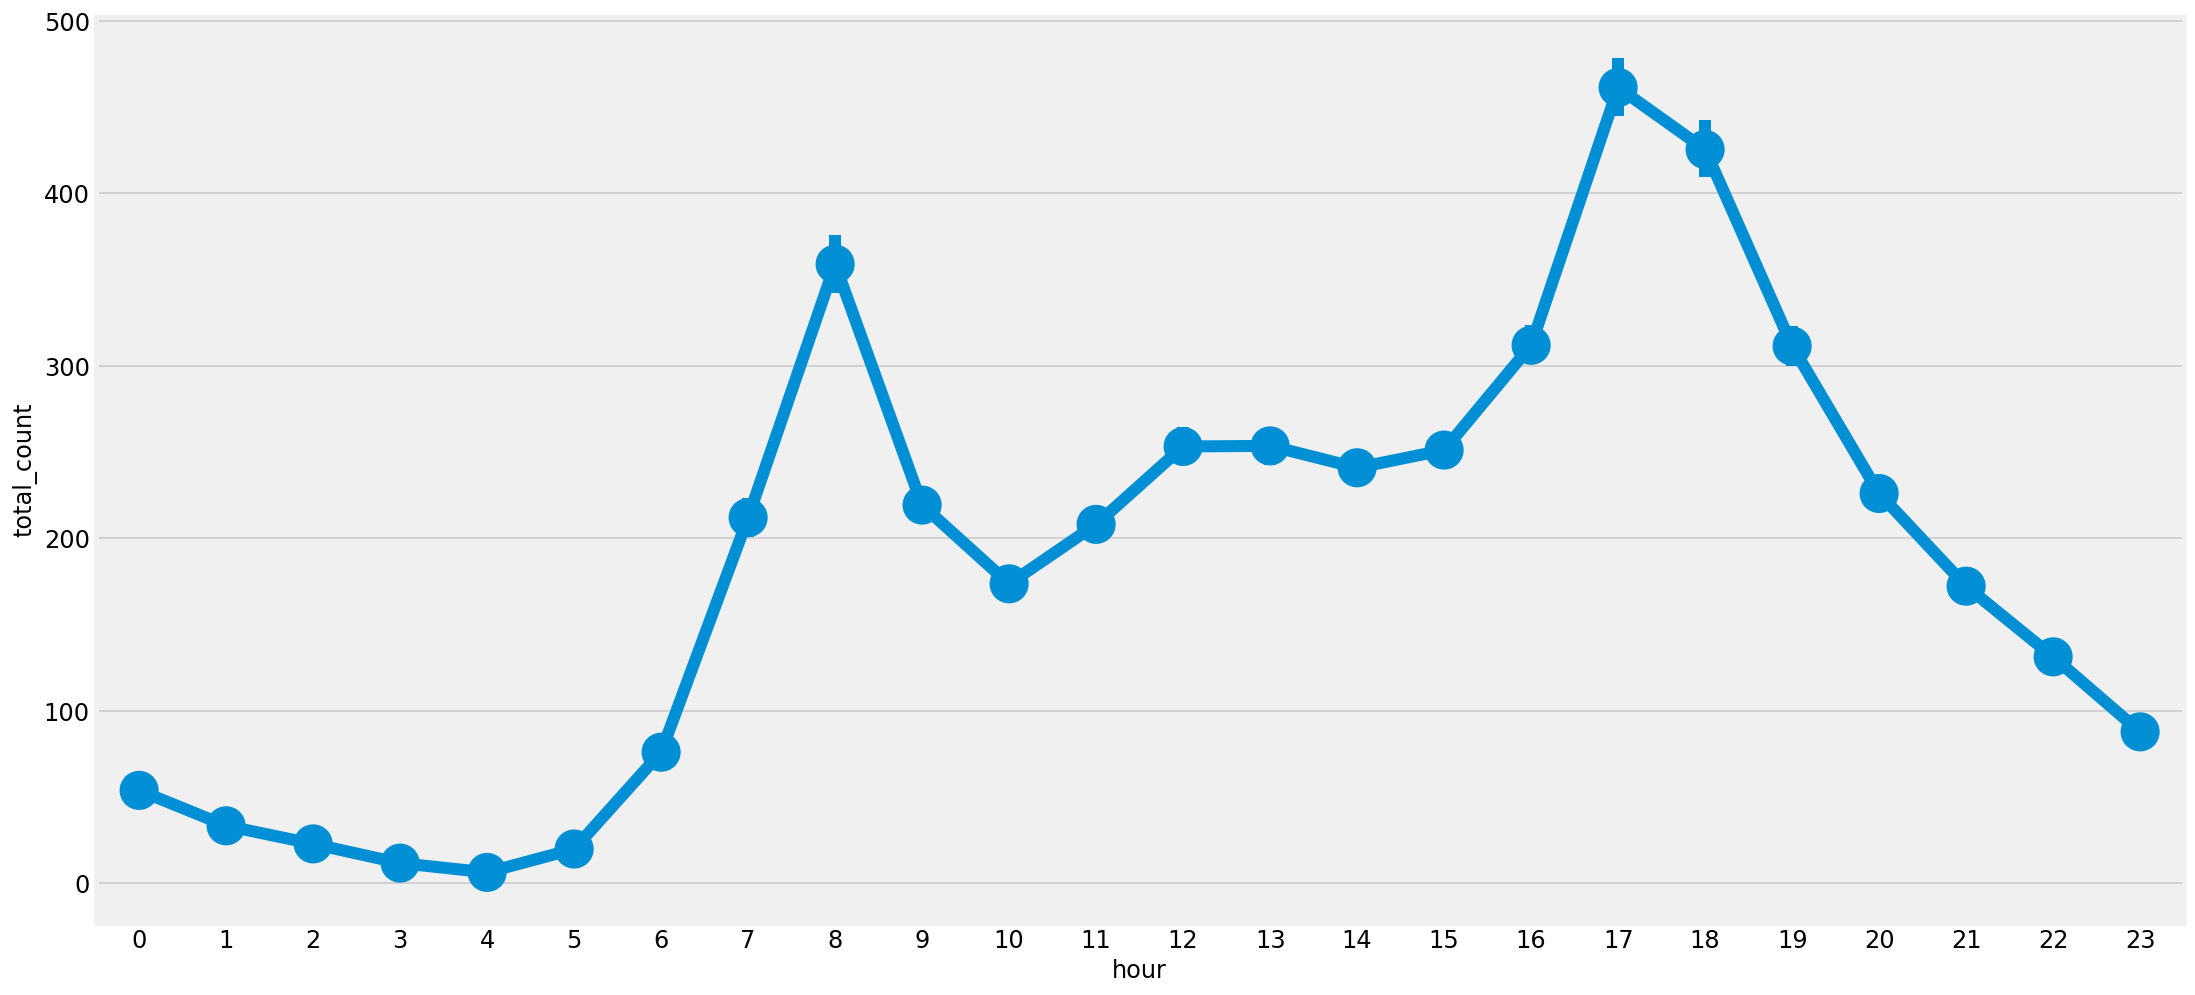

In [37]:
sns.pointplot(x="hour", y="total_count", data=hour_df);

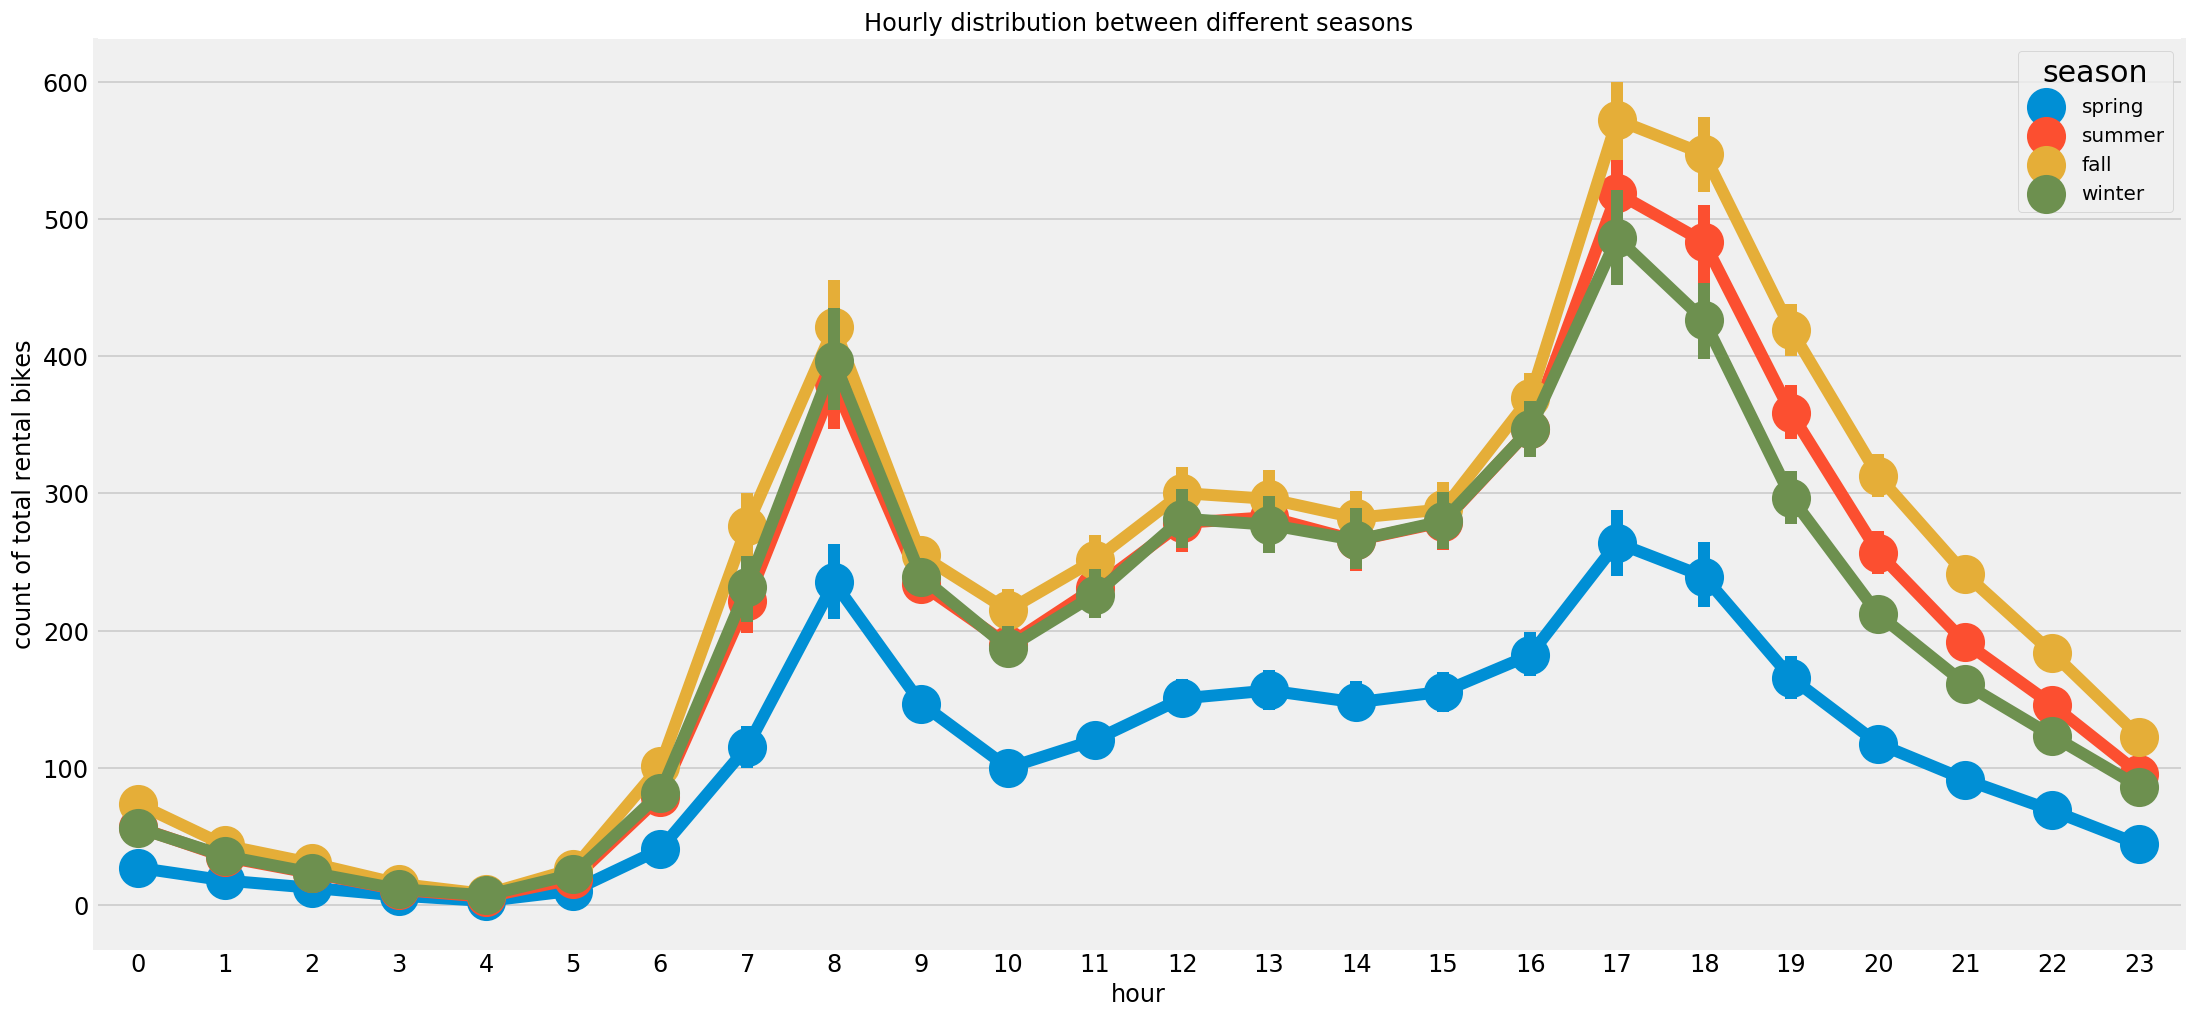

In [38]:
# hourly distribution between different seasons
data_hourly_season = hour_df[["hour", "season", "total_count"]].copy()
data_hourly_season["season"] = data_hourly_season["season"].map({1:"spring", 
                                                                 2:"summer", 
                                                                 3:"fall", 
                                                                 4:"winter"})

# ploting
fig, ax = plt.subplots()
sns.pointplot(data = data_hourly_season,
              x="hour", y="total_count", 
              hue="season", ax=ax)
ax.set(ylabel="count of total rental bikes", 
       title="Hourly distribution between different seasons");

* As shown above, peaks of bike usage are around 8am and 5pm due to start and end of office hours.
* The usage of bikes seems to be rather low in spring. (why?)

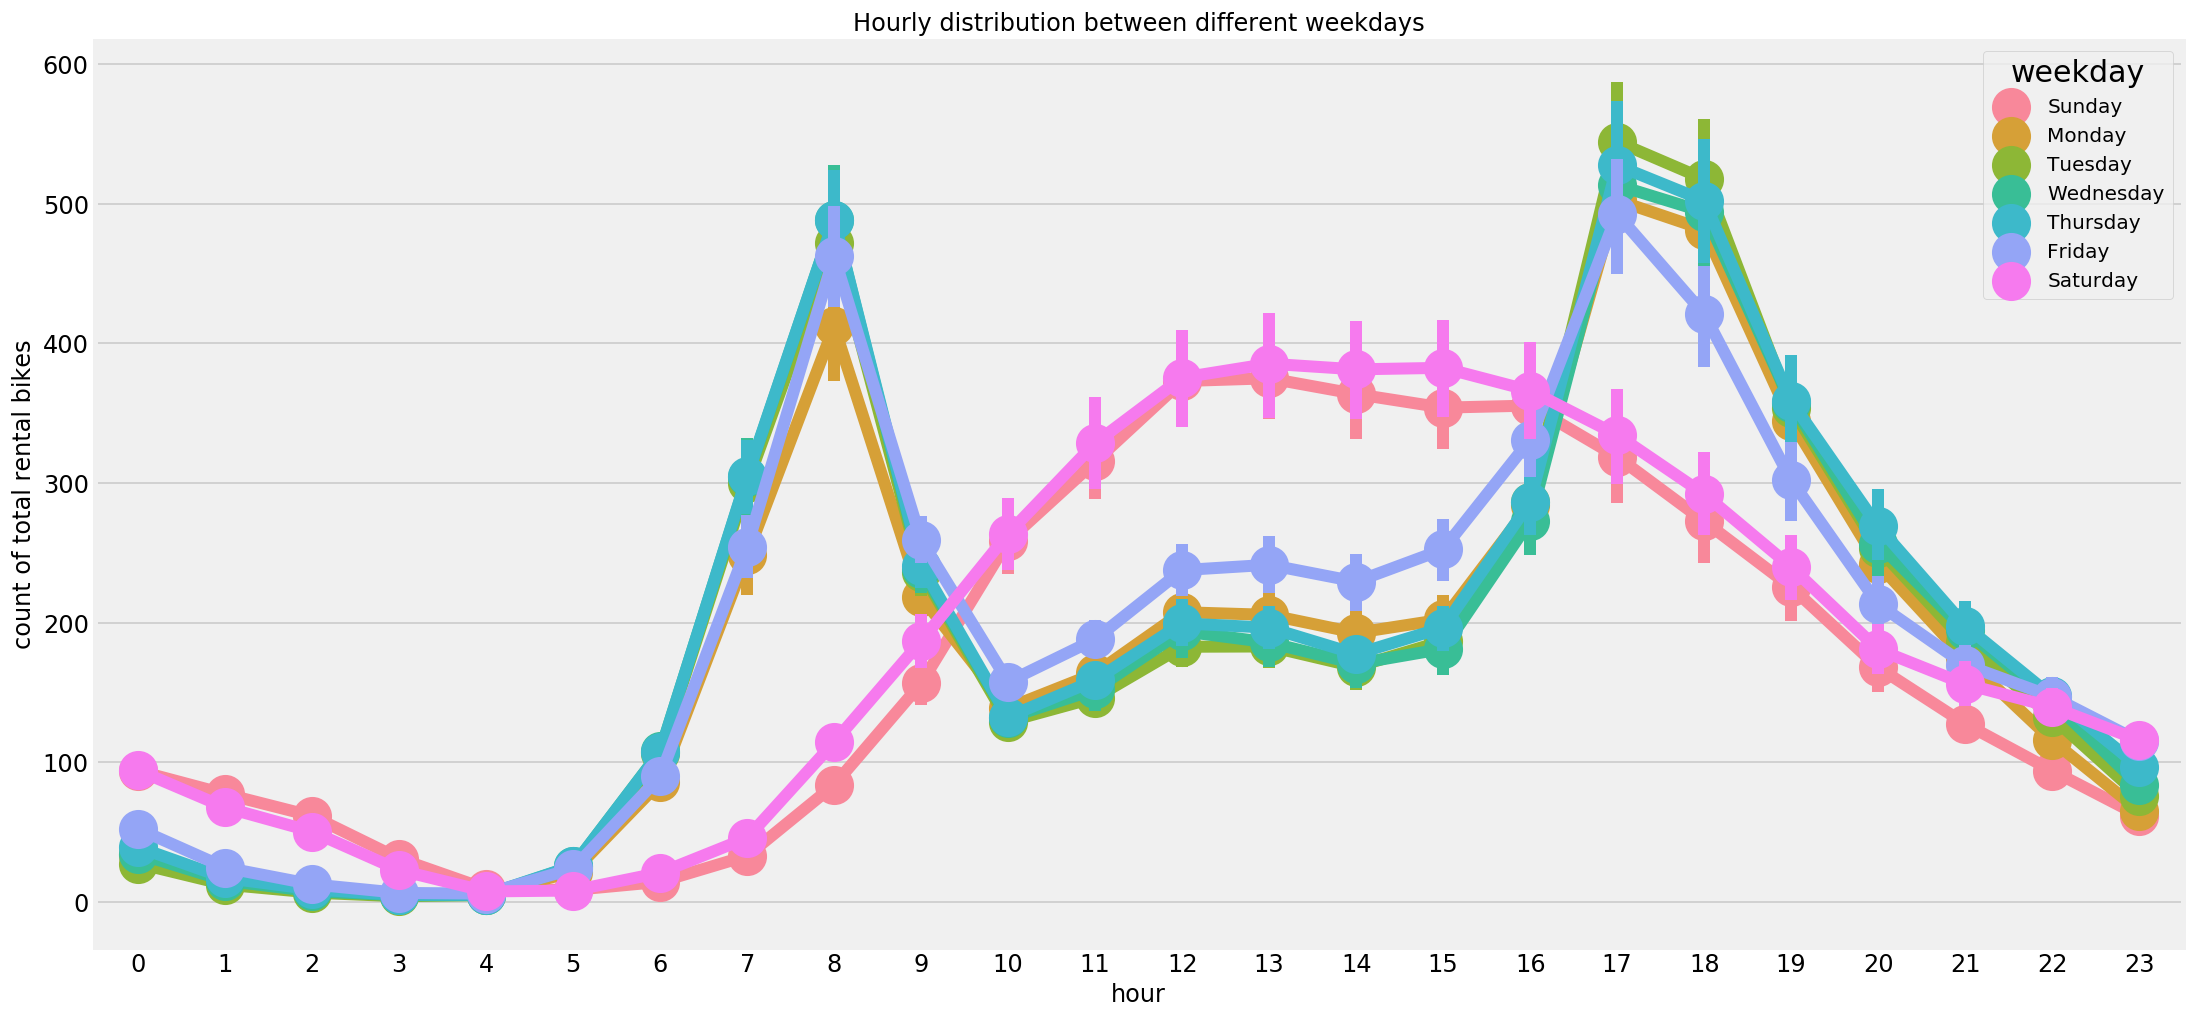

In [40]:
# hourly distribution between different weekdays
data_hourly_weekday = hour_df[["hour", "weekday", "total_count"]].copy()
data_hourly_weekday["weekday"] = data_hourly_weekday["weekday"].map({0:"Sunday",
                                                                    1:"Monday",
                                                                    2:"Tuesday",
                                                                    3:"Wednesday",
                                                                    4:"Thursday",
                                                                    5:"Friday",
                                                                    6:"Saturday"})

# plotting
fig, ax = plt.subplots()
sns.pointplot(data=data_hourly_weekday, x="hour", 
              y="total_count", hue="weekday", ax=ax)
ax.set(ylabel="count of total rental bikes", 
       title="Hourly distribution between different weekdays");

* Weekdays and weekend show different trends of bike usage.
* Peaks resulting from start and end of office hours appear on weekdays, not on weekend.
* It would be interesting to see the trends for casual and registered users separately.

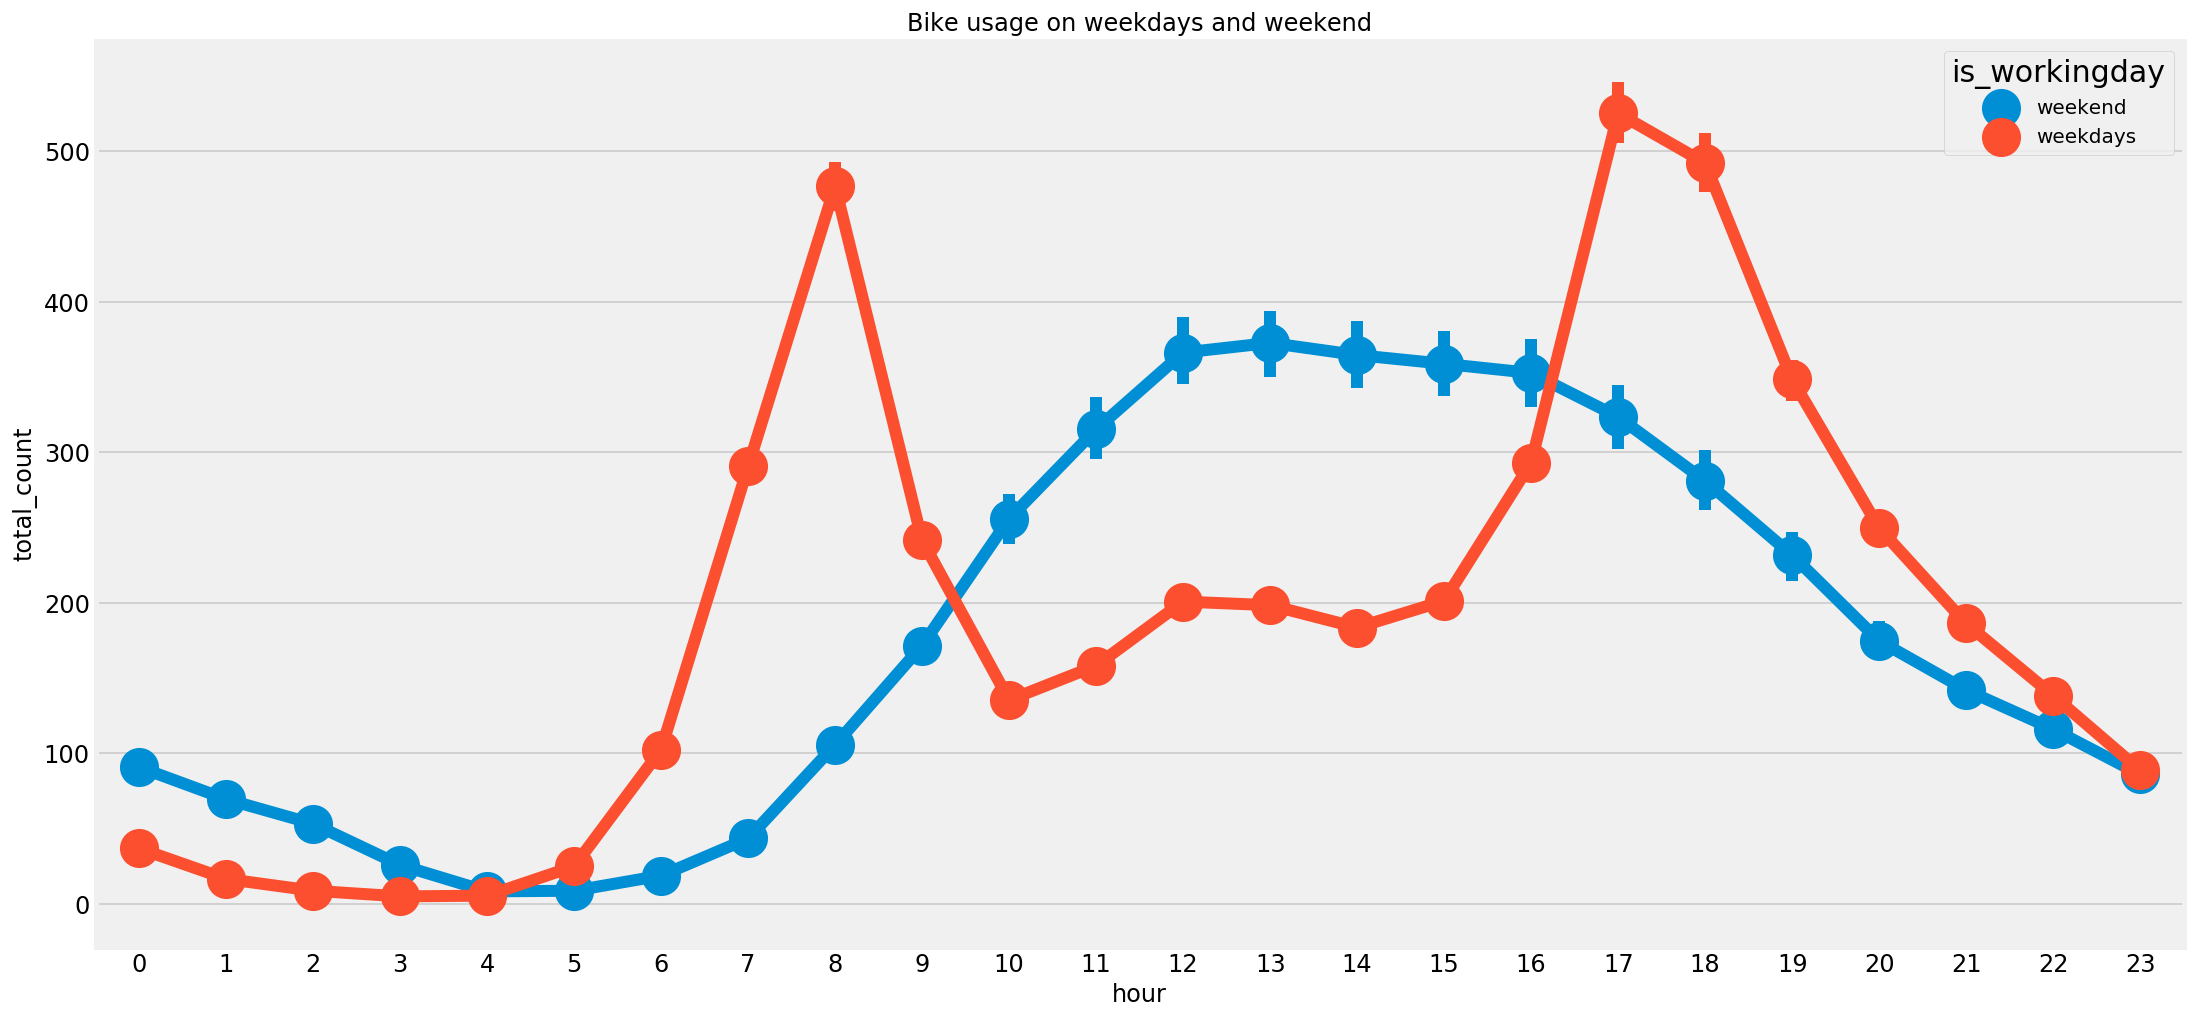

In [42]:
data_hourly_workingday = hour_df[["hour", "is_workingday", "total_count"]].copy()
data_hourly_workingday["is_workingday"] = data_hourly_workingday["is_workingday"].map({0:"weekend",
                                                                                      1:"weekdays"})

fig, ax = plt.subplots()
sns.pointplot(x="hour", y="total_count", 
              hue="is_workingday", 
              data=data_hourly_workingday, ax=ax)
ax.set(title="Bike usage on weekdays and weekend");

* There are clearly different trends on weekdays and on weekend.

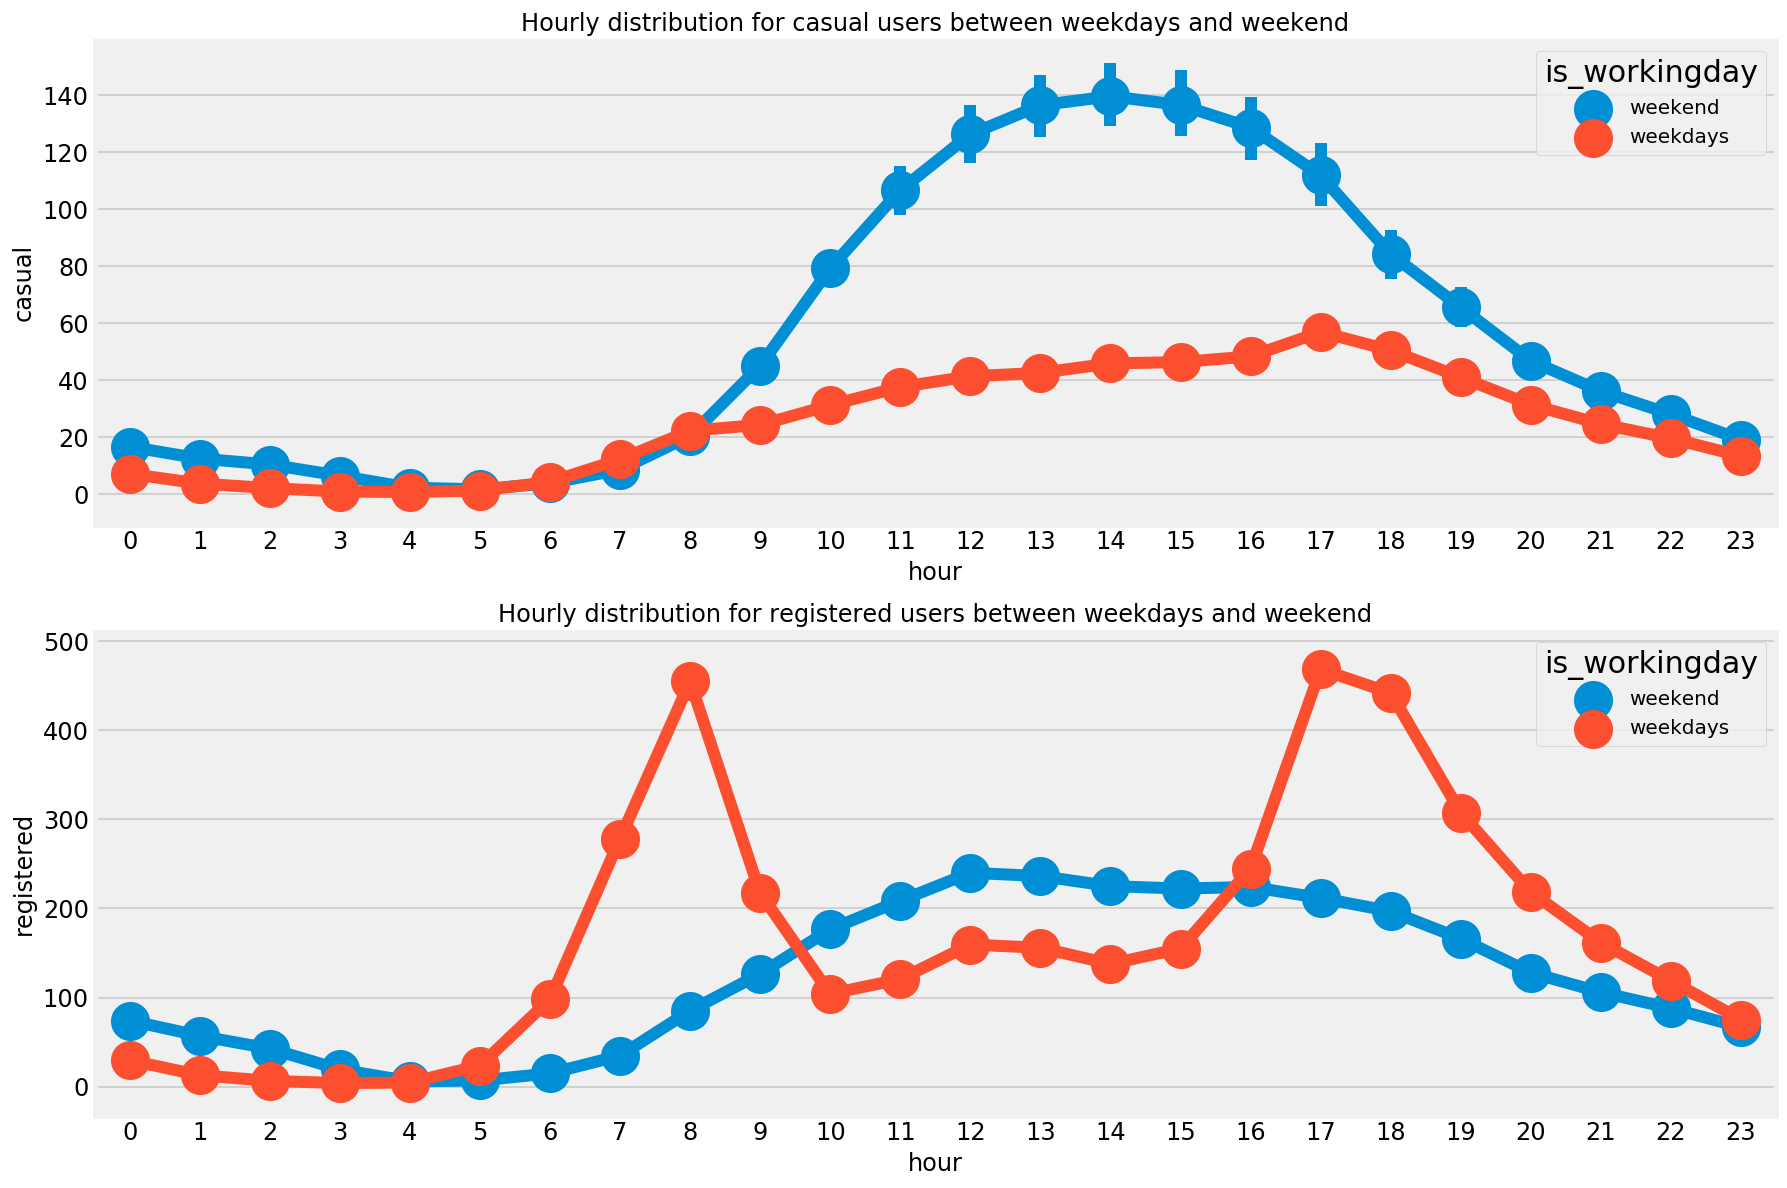

In [43]:
data_hourly_workingday = hour_df[["hour", "is_workingday", "casual", "registered"]].copy()
data_hourly_workingday["is_workingday"] = data_hourly_workingday["is_workingday"].map({0:"weekend",
                                                                                      1:"weekdays"})

fig = plt.figure(figsize=(15, 10), dpi=120)

ax1 = fig.add_subplot(211)
sns.pointplot(y="casual", x = "hour", hue="is_workingday", data=data_hourly_workingday)
ax1.set(title="Hourly distribution for casual users between weekdays and weekend")

ax2 = fig.add_subplot(212)
sns.pointplot(y="registered", x = "hour", hue="is_workingday", data=data_hourly_workingday)
ax2.set(title="Hourly distribution for registered users between weekdays and weekend")

plt.tight_layout()

* Overall usage for casual users is higer on weekend than on weekdays, while registered users use rental bikes more on weekdays.

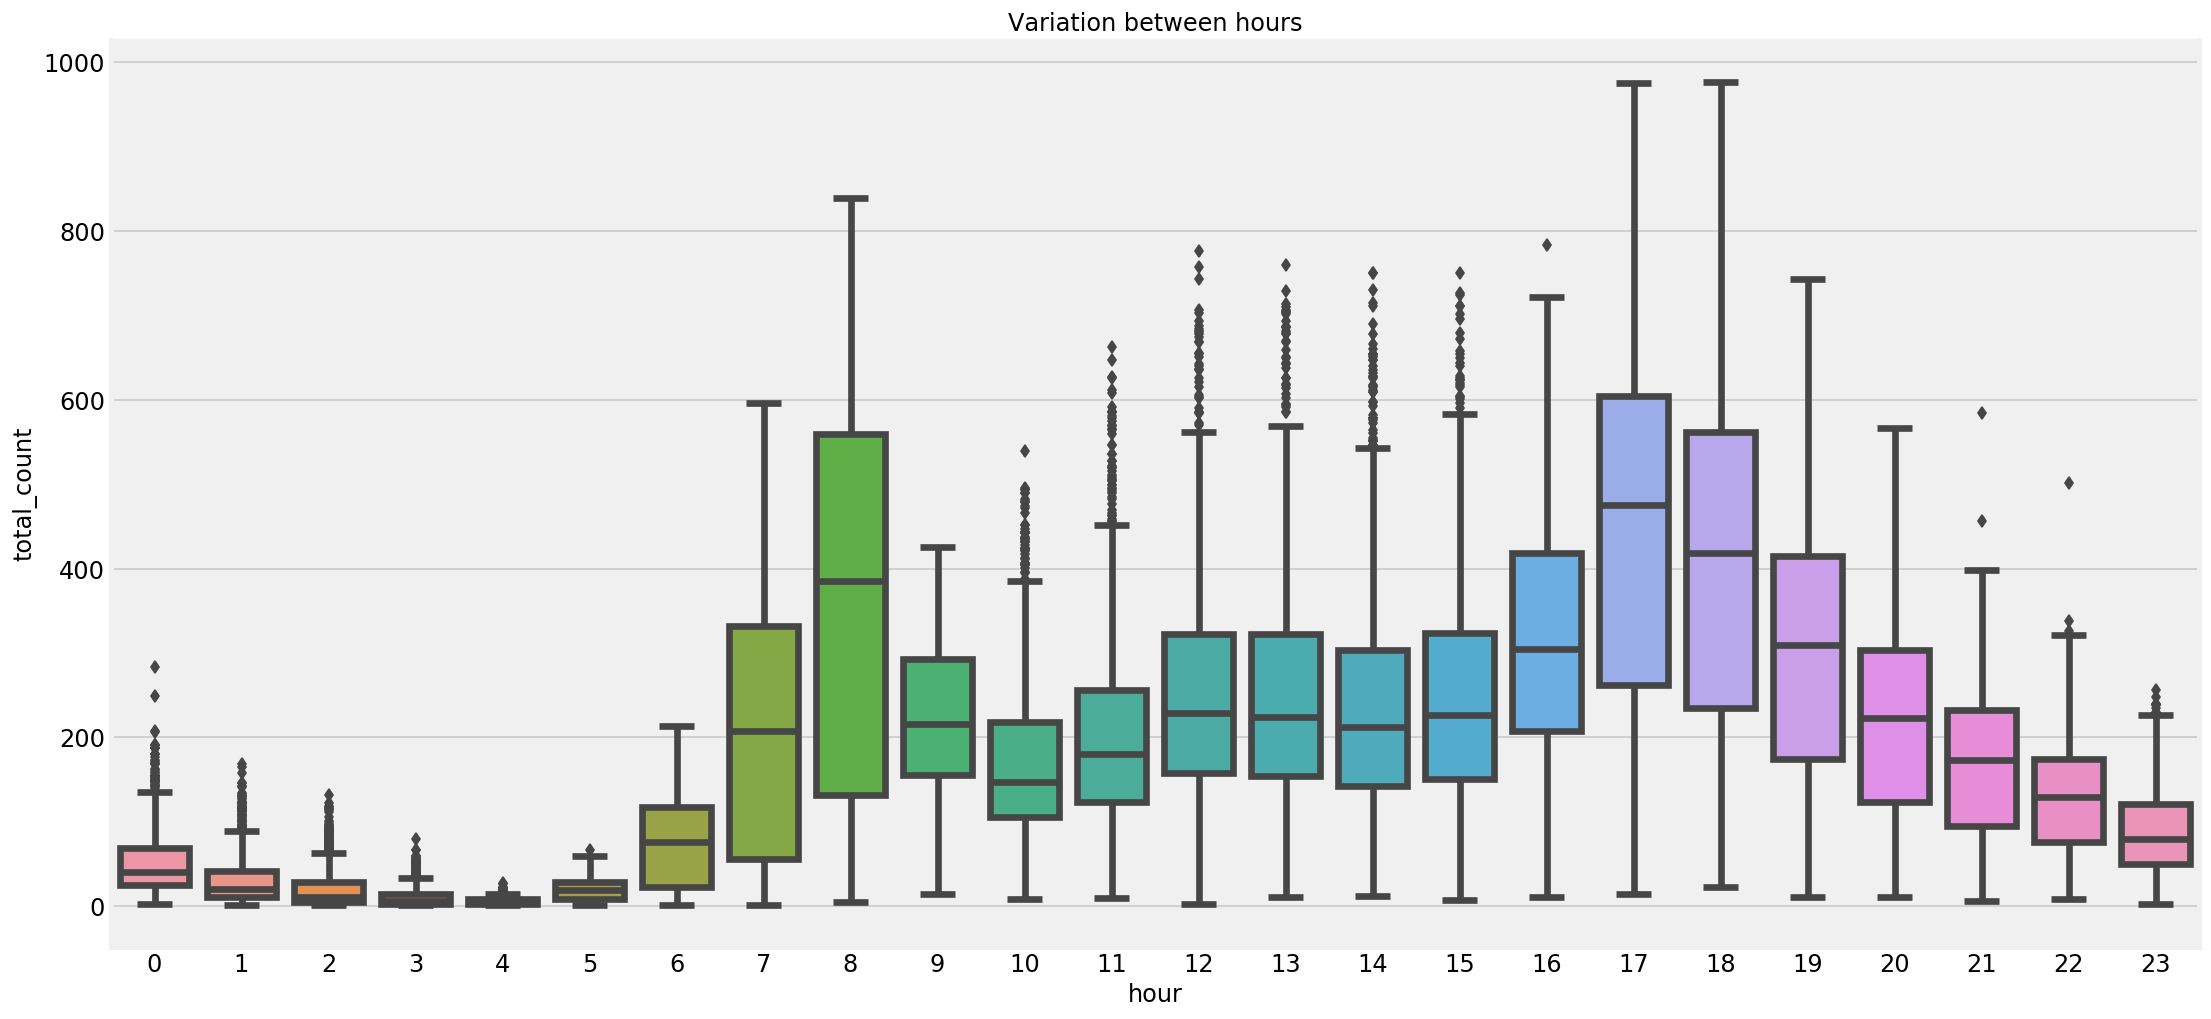

In [44]:
fig, ax = plt.subplots()
sns.boxplot(x="hour", y="total_count", data=hour_df, ax=ax)
ax.set_title("Variation between hours");

### Monthly distribution of bikes usage

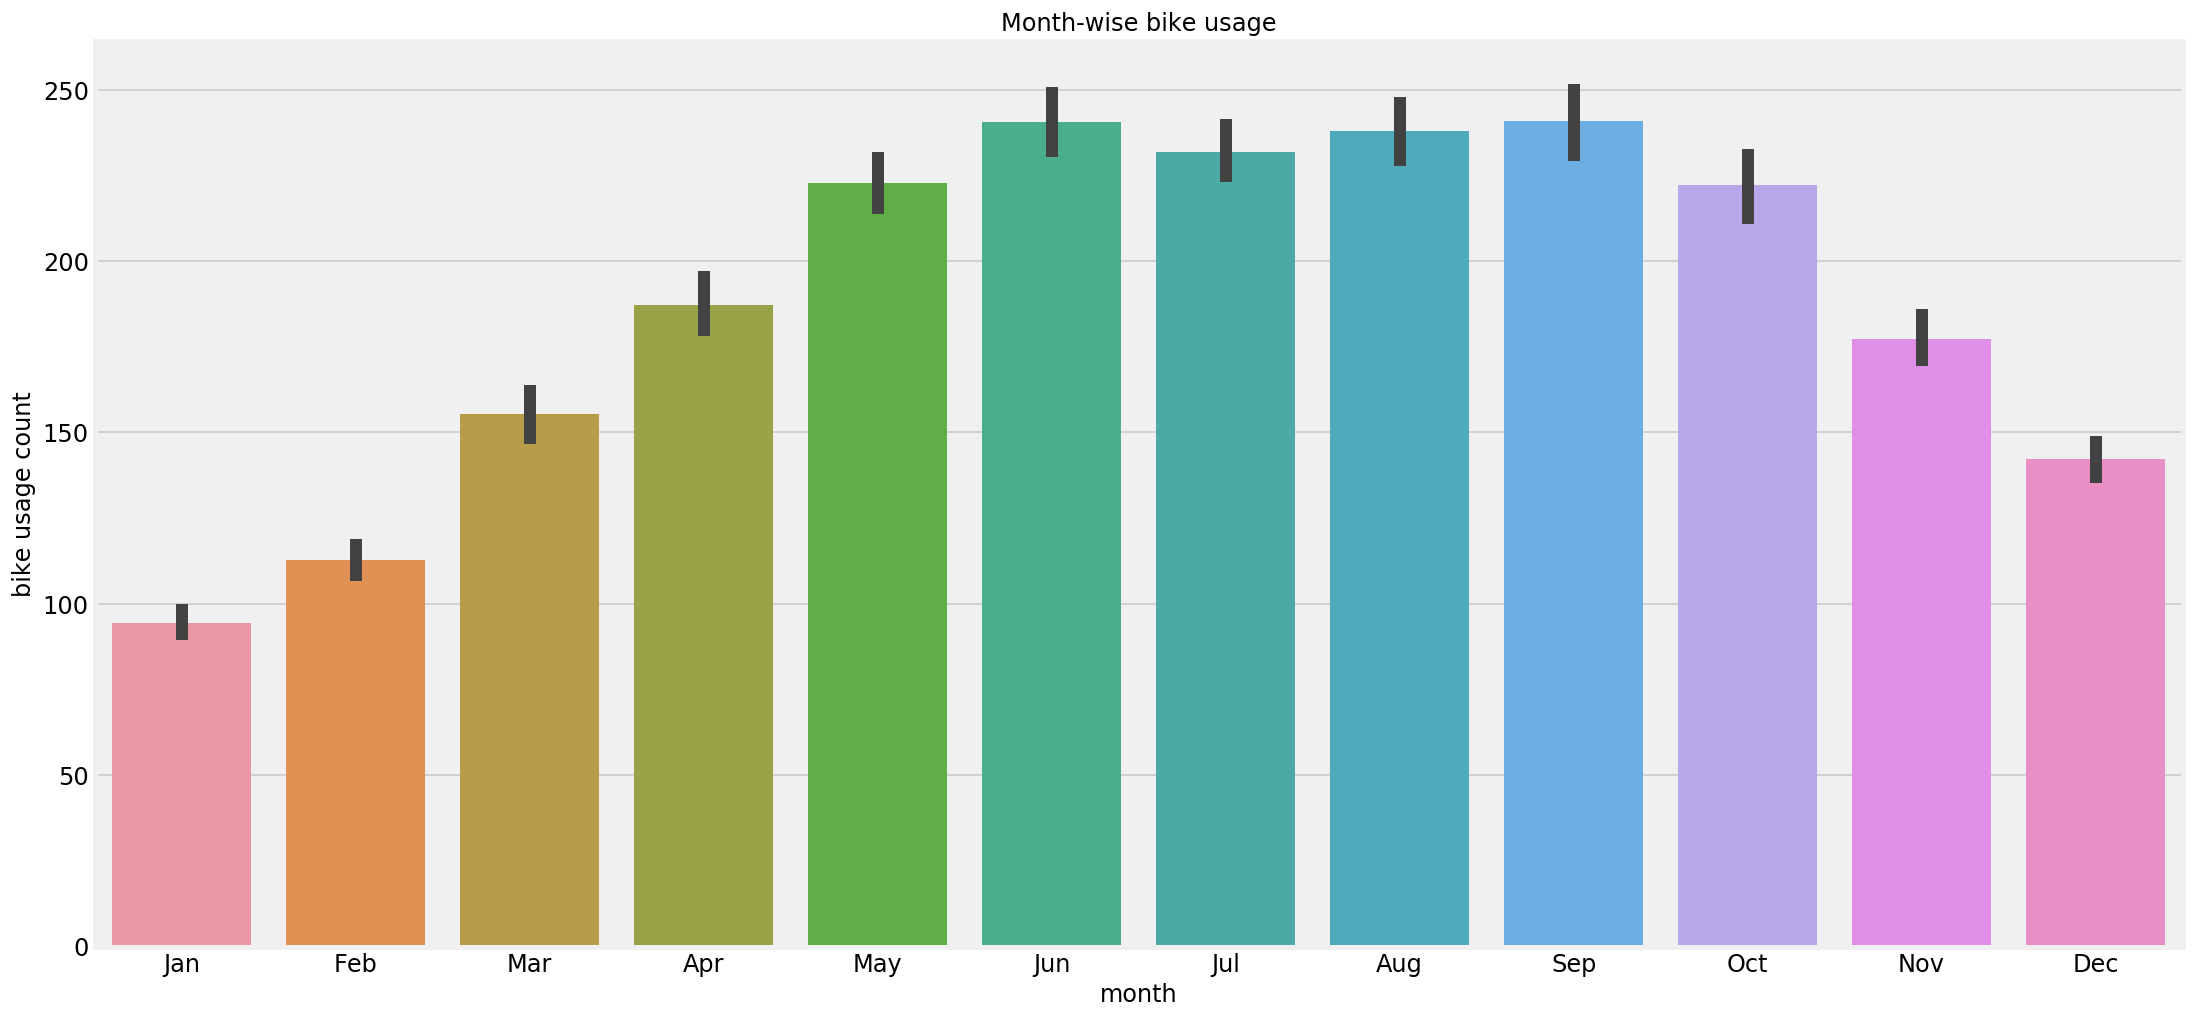

In [45]:
data_month = hour_df[["month", "total_count"]].copy()
data_month["month"] = data_month["month"].map({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr",
                                               5:"May", 6:"Jun", 7:"Jul", 8:"Aug",
                                               9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})

fig, ax = plt.subplots()
sns.barplot(x="month", y="total_count", data=data_month, ax=ax)
ax.set(title="Month-wise bike usage", ylabel="bike usage count");

* Usage of bike mostly lies in June to September.
* Fall seems to be favorite time of the year to use bicycles.

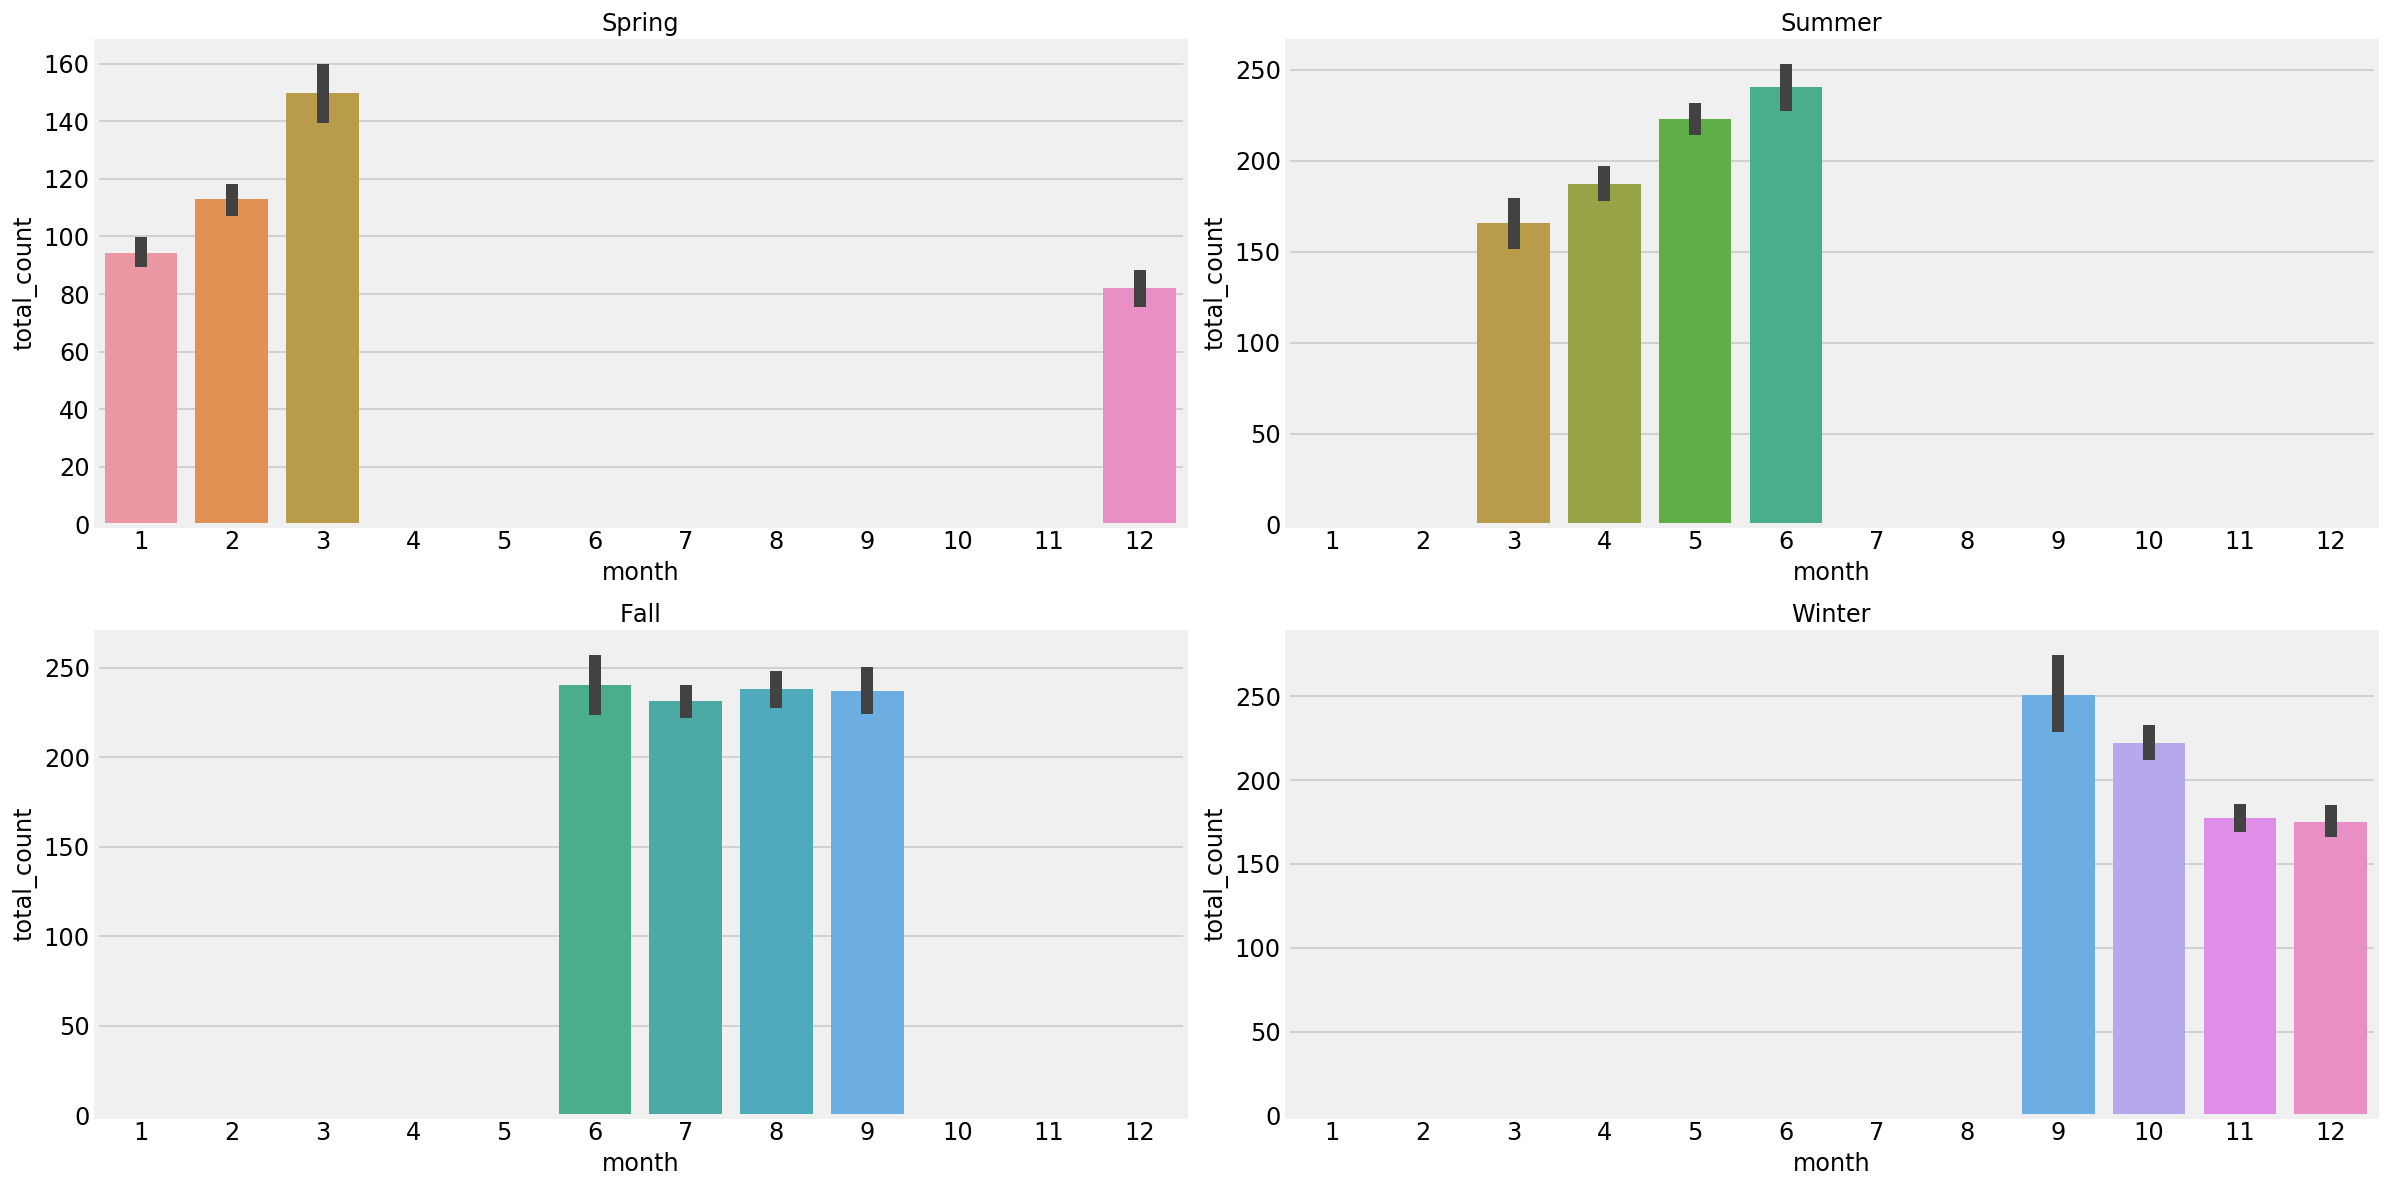

In [46]:
attribute_list = ["month", "season", "total_count"]
spring_df = hour_df[hour_df.season==1][attribute_list]
summer_df = hour_df[hour_df.season==2][attribute_list]
fall_df = hour_df[hour_df.season==3][attribute_list]
winter_df = hour_df[hour_df.season==4][attribute_list]

fig, ax = plt.subplots(nrows=2, ncols=2)

sns.barplot(x="month", y="total_count", data=spring_df, ax=ax[0][0])
ax[0][0].set(title="Spring")

sns.barplot(x="month", y="total_count", data=summer_df, ax=ax[0][1])
ax[0][1].set(title="Summer")

sns.barplot(x="month", y="total_count", data=fall_df, ax=ax[1][0])
ax[1][0].set(title="Fall")

sns.barplot(x="month", y="total_count", data=winter_df, ax=ax[1][1])
ax[1][1].set(title="Winter")

plt.tight_layout()

### Yearly distribution

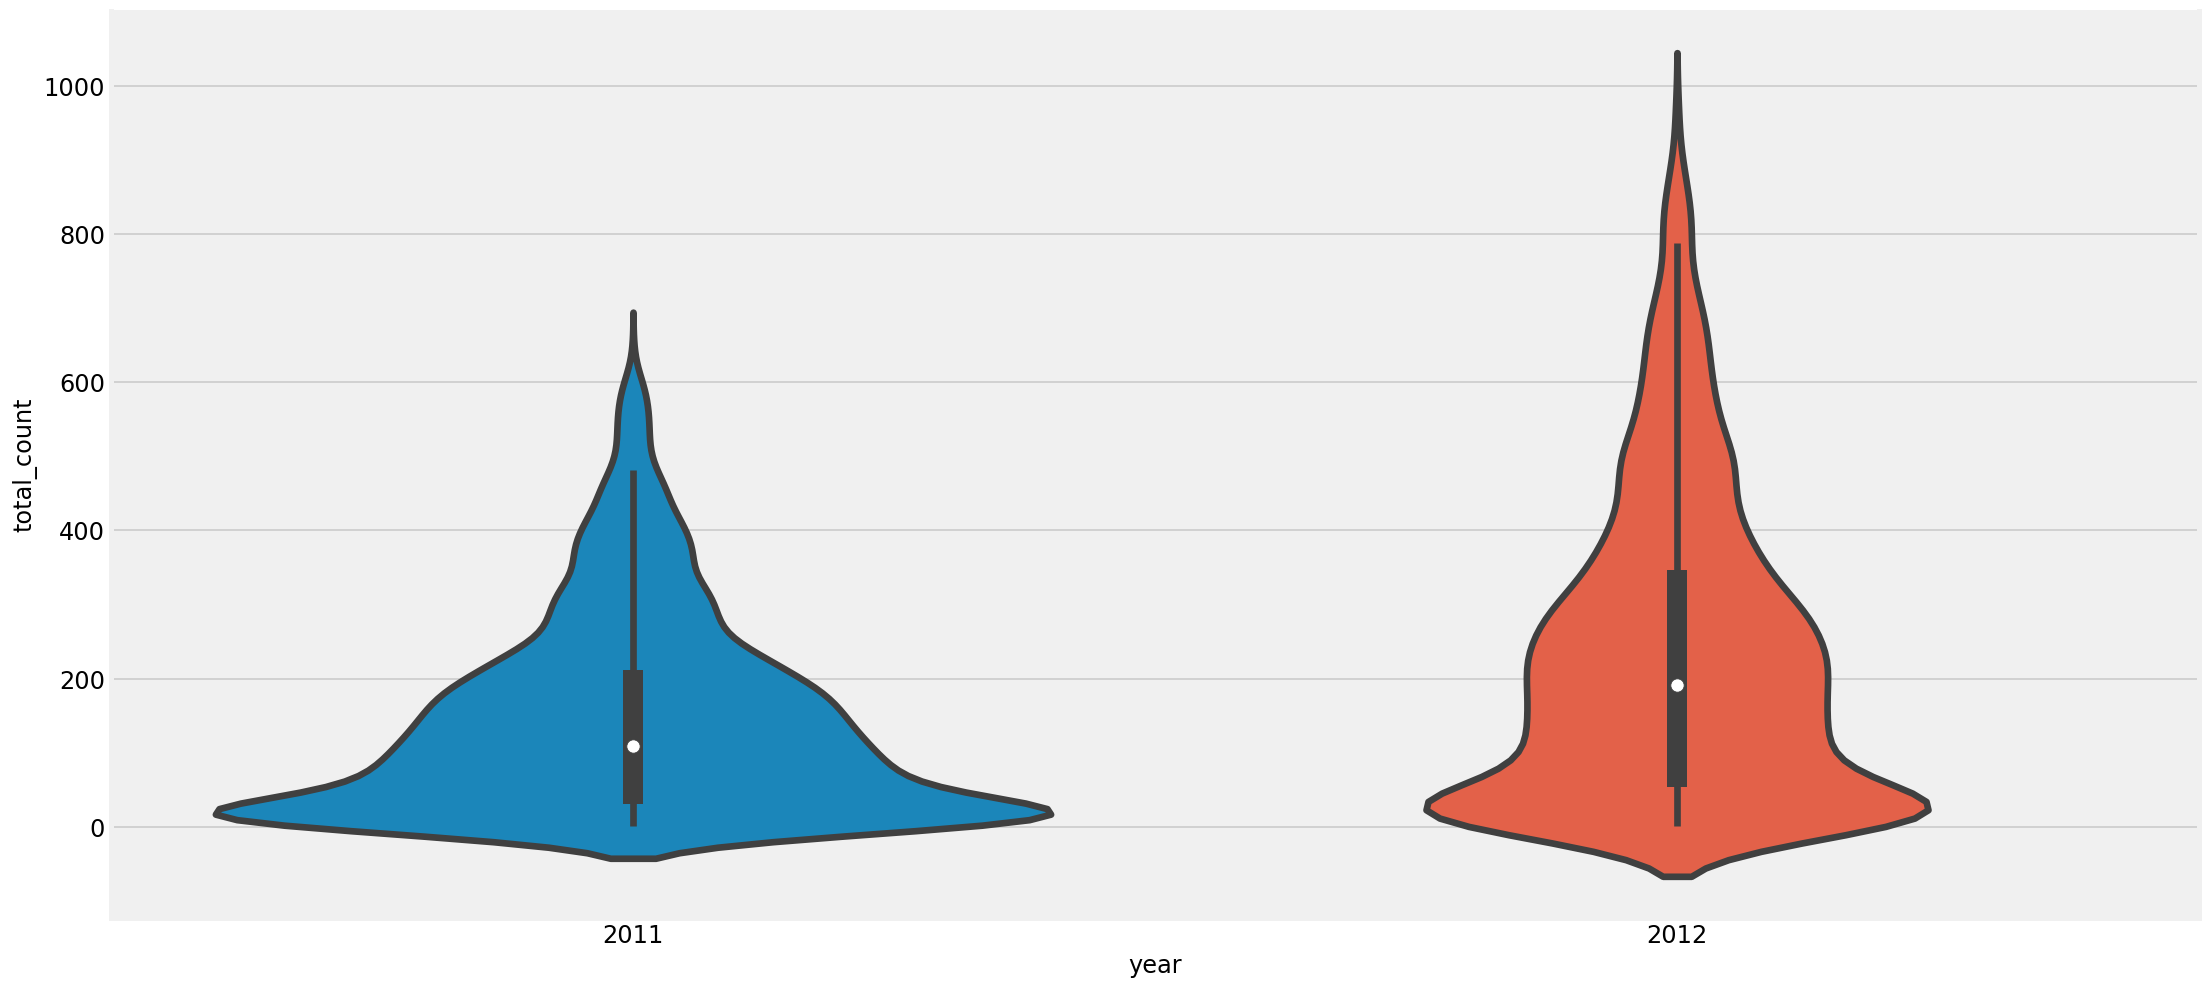

In [48]:
data_year = hour_df[["year", "total_count"]].copy()
data_year["year"] = data_year.year.map({0:"2011", 1:"2012"})

fig, ax = plt.subplots()
sns.violinplot(y="total_count", x="year", data=data_year);

## Check extreme value (outliers) in numeric variables

### Total count

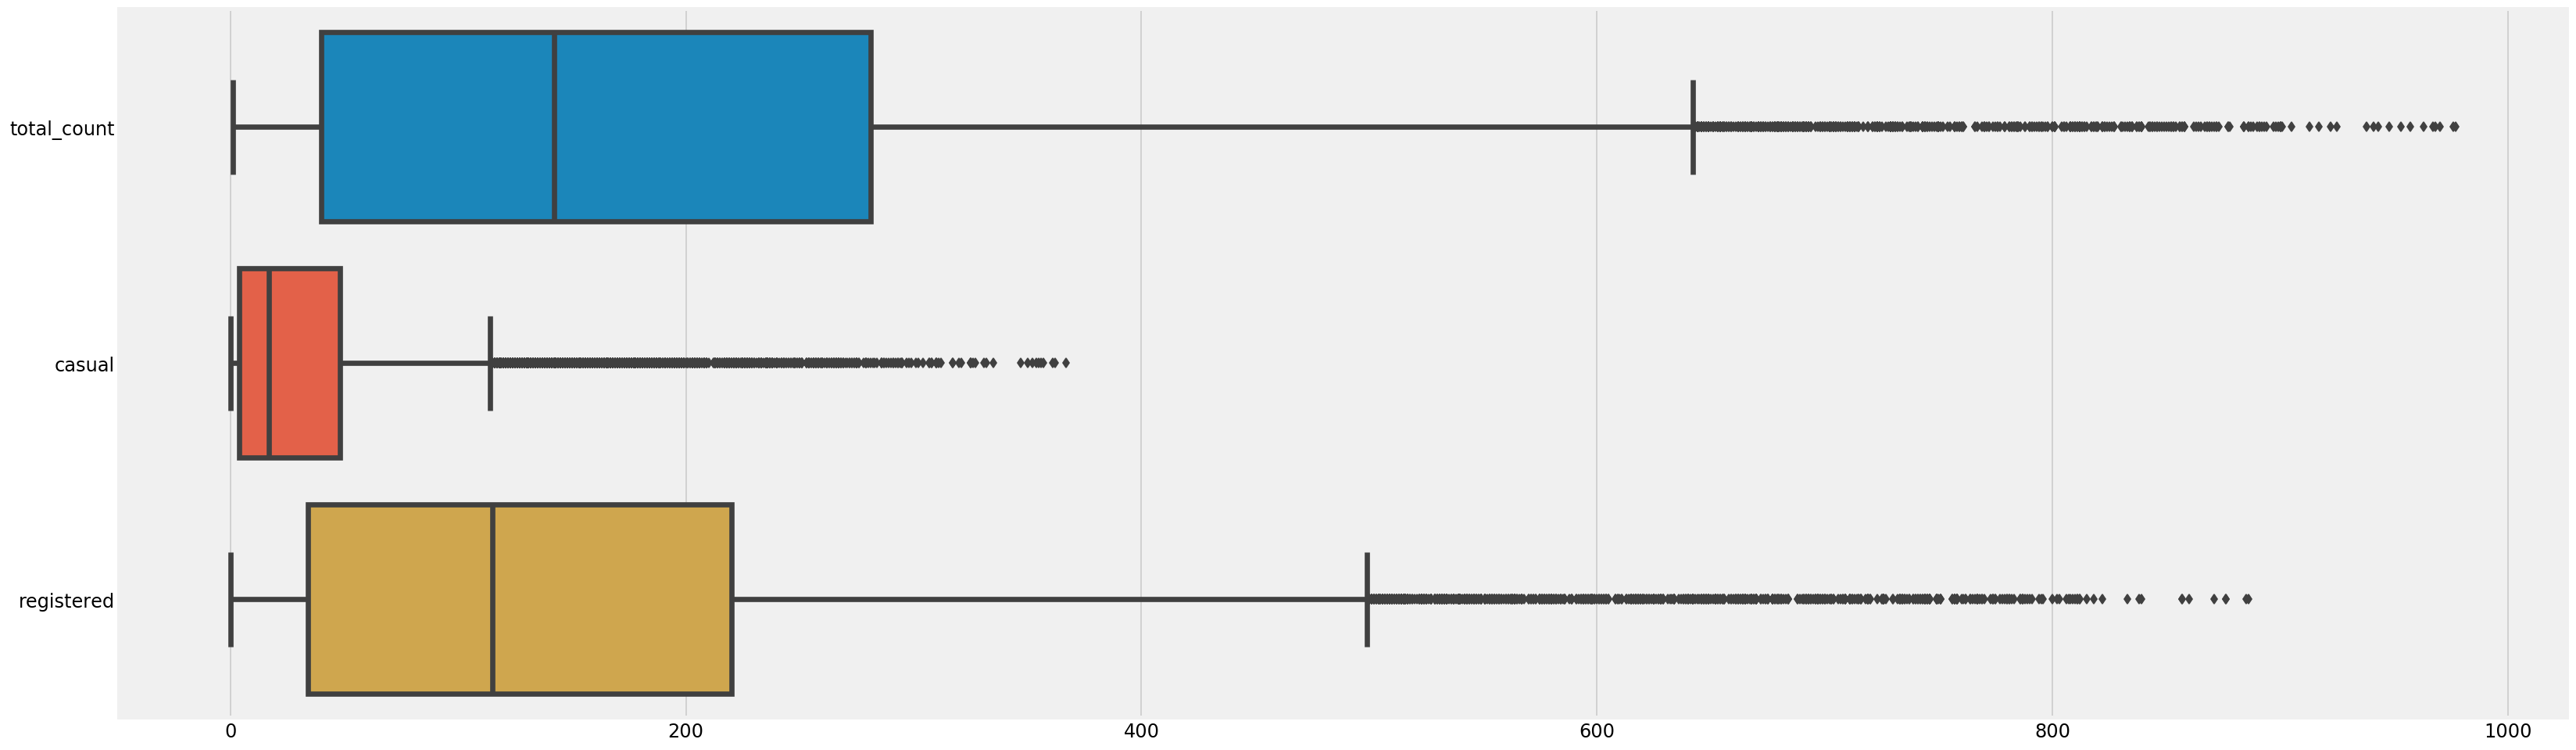

In [49]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.boxplot(data=hour_df[["total_count", "casual", "registered"]], orient="h");

### Temperature, wind speed

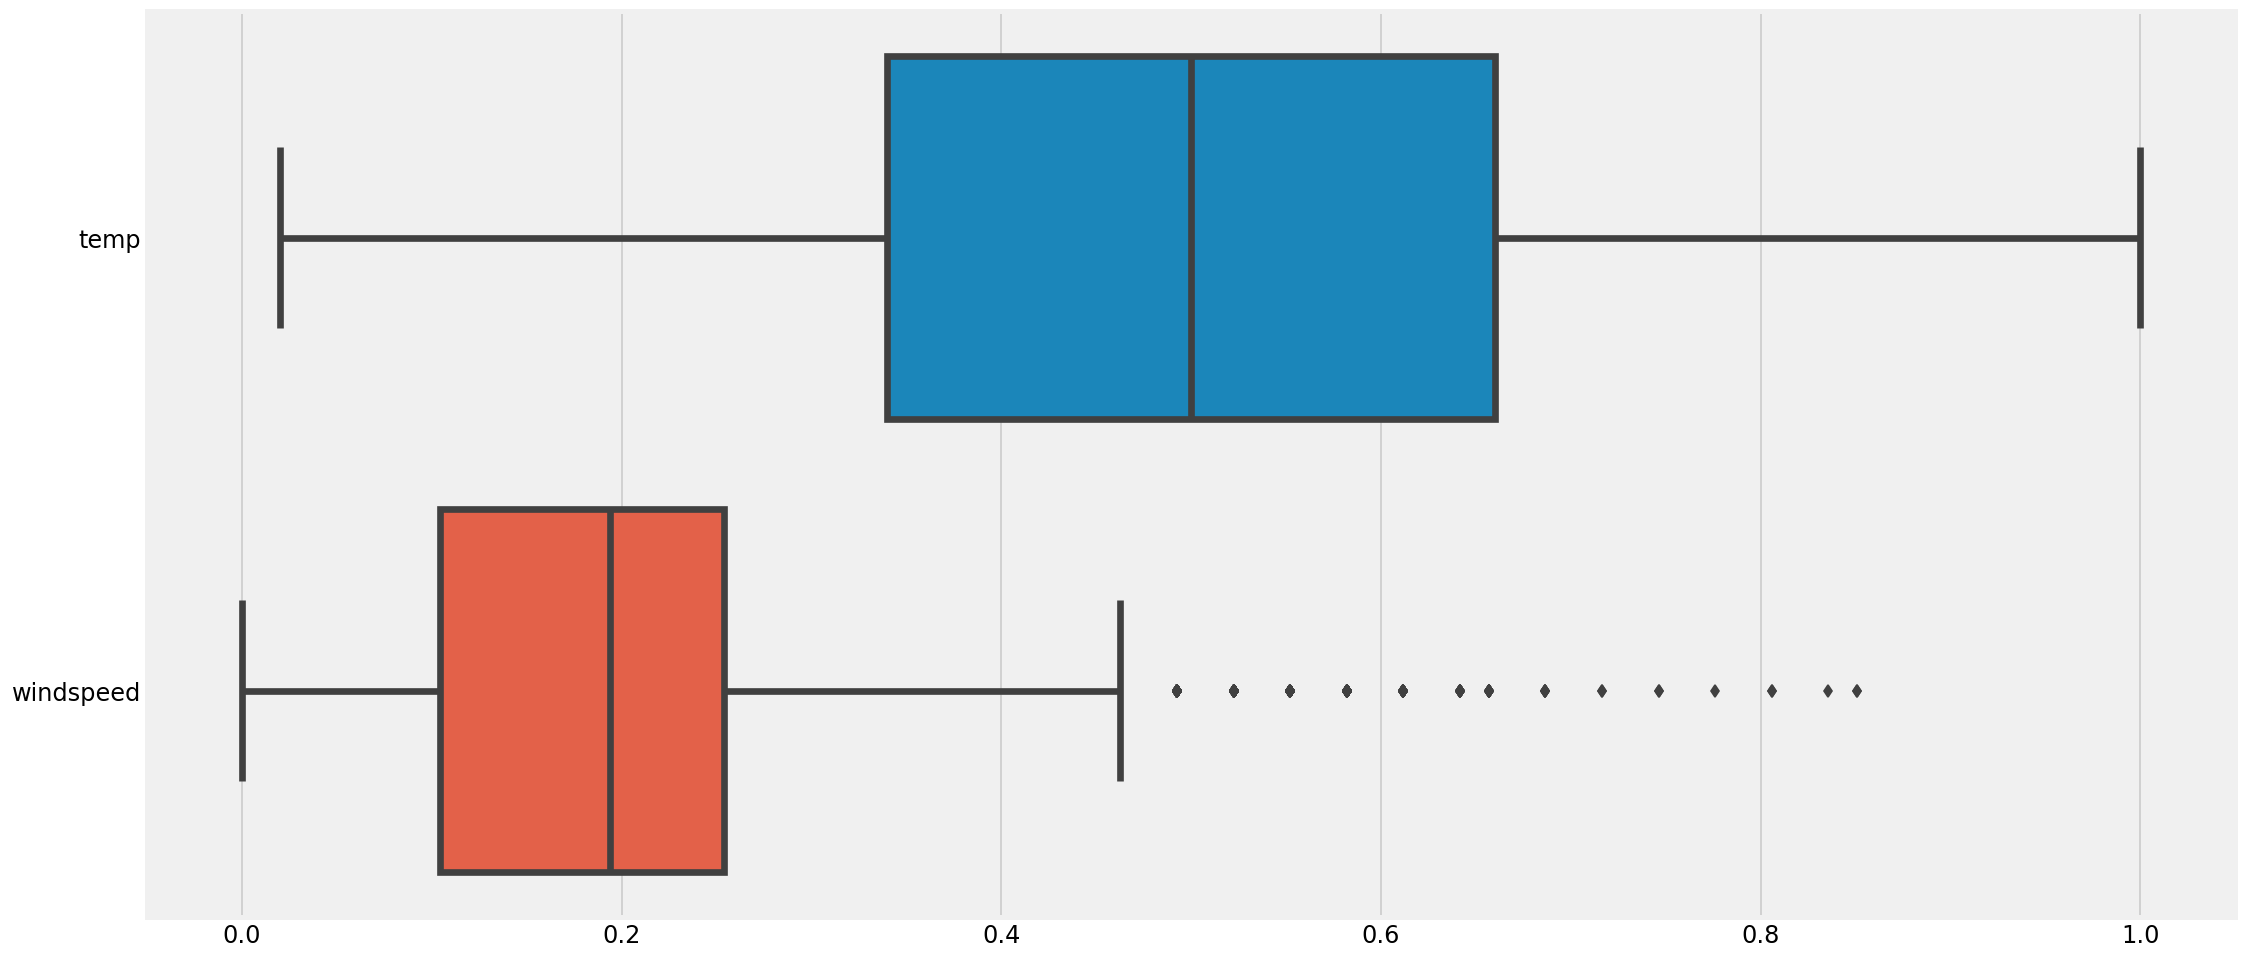

In [50]:
fig, ax = plt.subplots()
sns.boxplot(data=hour_df[["temp", "windspeed"]], orient="h");

## Correlation